<a href="https://colab.research.google.com/github/harshit-coder-dev/ML-projects/blob/master/Food_Delivery_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Delivery Time Prediction

Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_curve, auc

Load Dataset

In [3]:
import pandas as pd
df = pd.read_csv('/content/Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [6]:
import ast
# 2. Handle Coordinates (Transformation)
def extract_coords(coord_str):
    return ast.literal_eval(coord_str)

df['Cust_Lat'], df['Cust_Lon'] = zip(*df['Customer_Location'].apply(extract_coords))
df['Res_Lat'], df['Res_Lon'] = zip(*df['Restaurant_Location'].apply(extract_coords))

# 3. Encode Categorical Variables
le = LabelEncoder()
df['Weather_Encoded'] = le.fit_transform(df['Weather_Conditions'])
df['Traffic_Encoded'] = le.fit_transform(df['Traffic_Conditions'])
df['Priority_Encoded'] = le.fit_transform(df['Order_Priority'])

# 4. Standardize Numeric Columns (Normalization)
scaler = StandardScaler()
num_cols = ['Distance', 'Order_Cost', 'Delivery_Person_Experience']
df[num_cols] = scaler.fit_transform(df[num_cols])

Exploratory Data Analysis (EDA)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive Statistics
print(df.describe())

           Distance  Delivery_Person_Experience  Restaurant_Rating  \
count  2.000000e+02                2.000000e+02         200.000000   
mean  -1.643130e-16                4.440892e-18           3.738500   
std    1.002509e+00                1.002509e+00           0.703021   
min   -1.608593e+00               -1.552139e+00           2.500000   
25%   -7.924313e-01               -8.217208e-01           3.200000   
50%   -1.806765e-01               -9.130231e-02           3.800000   
75%    7.325599e-01                1.004325e+00           4.300000   
max    1.963762e+00                1.734744e+00           5.000000   

       Customer_Rating  Delivery_Time    Order_Cost  Tip_Amount    Cust_Lat  \
count       200.000000     200.000000  2.000000e+02  200.000000  200.000000   
mean          3.686500      70.494950 -2.042810e-16   46.616650   16.997762   
std           0.697063      29.830694  1.002509e+00   29.361706    3.097039   
min           2.600000      15.230000 -1.688954e+00  

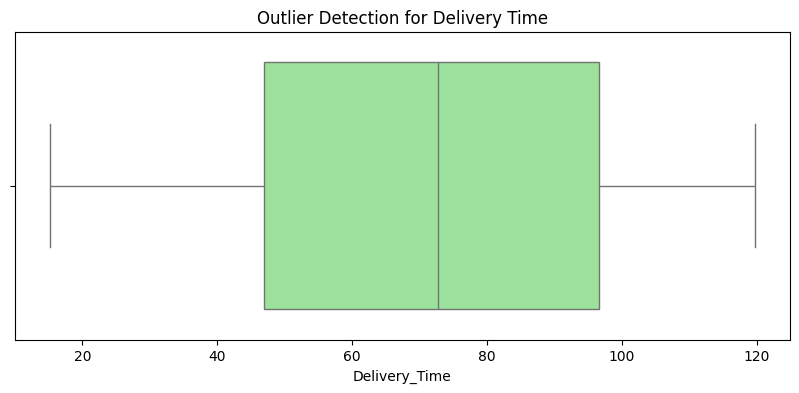

In [8]:
# Outlier Detection (Boxplots)
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Delivery_Time'], color='lightgreen')
plt.title("Outlier Detection for Delivery Time")
plt.show()

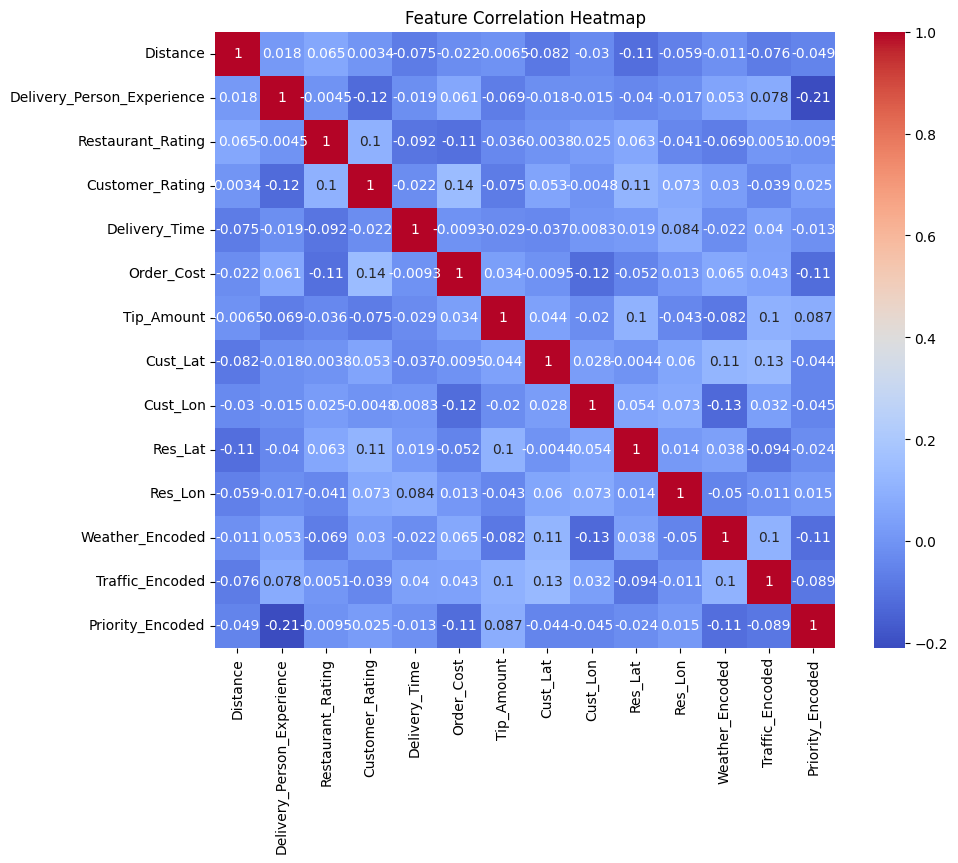

In [9]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# Create Rush Hour Feature (Assume evening/night as high traffic)
# Using 'Order_Time' to create a binary Rush_Hour column
df['Is_Rush_Hour'] = df['Order_Time'].apply(lambda x: 1 if x in ['Evening', 'Night'] else 0)

Linear Regression (Predicting Exact Time)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Features and Target
X = df[['Distance', 'Delivery_Person_Experience', 'Weather_Encoded', 'Traffic_Encoded', 'Is_Rush_Hour']]
y = df['Delivery_Time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Evaluation
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lin)}")
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lin)}")

Linear Regression MSE: 955.7882852259879
Linear Regression R2: -0.033406173043074805


Logistic Regression (Categorizing Speed)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create Category: 1 for Delayed (above median), 0 for Fast
median_val = df['Delivery_Time'].median()
y_class = (df['Delivery_Time'] > median_val).astype(int)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Model Building
log_model = LogisticRegression()
log_model.fit(X_train_c, y_train_c)
y_pred_log = log_model.predict(X_test_c)

# Evaluation
print(classification_report(y_test_c, y_pred_log))

              precision    recall  f1-score   support

           0       0.50      0.47      0.49        19
           1       0.55      0.57      0.56        21

    accuracy                           0.53        40
   macro avg       0.52      0.52      0.52        40
weighted avg       0.52      0.53      0.52        40



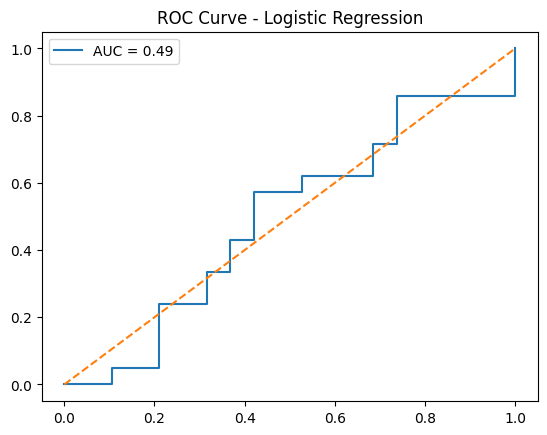

In [15]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_c, log_model.predict_proba(X_test_c)[:,1])
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

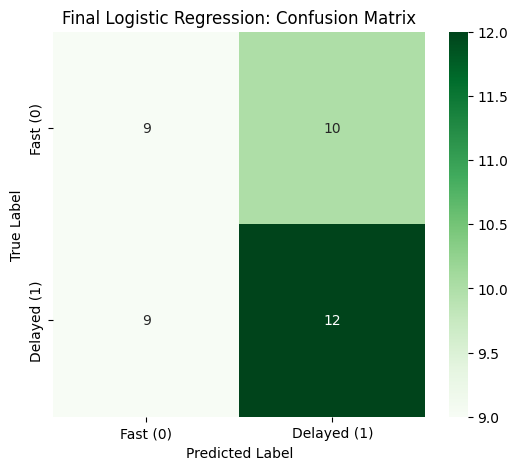

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test_c and y_pred_log are your Logistic Regression variables
cm = confusion_matrix(y_test_c, y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fast (0)', 'Delayed (1)'],
            yticklabels=['Fast (0)', 'Delayed (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Final Logistic Regression: Confusion Matrix')
plt.show()

### Insights from Exploratory Data Analysis

#### Descriptive Statistics Overview:

*   **Delivery_Time**: The average delivery time is approximately 70.5 minutes, with a standard deviation of 29.8 minutes. Times range from a minimum of 15.23 minutes to a maximum of 119.67 minutes. This wide range suggests significant variability in delivery durations.
*   **Distance**: The standardized distance shows a mean close to 0 and a standard deviation of 1, as expected after `StandardScaler` application.
*   **Delivery_Person_Experience**: Ranges from 1 to 9 years, with an average around 5 years. This could be an important factor.
*   **Restaurant_Rating / Customer_Rating**: Both show a good range (2.5-5.0 for restaurant, 2.6-5.0 for customer), indicating varying levels of satisfaction and quality.
*   **Order_Cost / Tip_Amount**: These are also standardized, indicating variability in order value and tips.

#### Outlier Detection:

*   The boxplot for `Delivery_Time` shows a relatively symmetric distribution with no extreme outliers beyond the whiskers. This suggests that the data does not contain highly unusual delivery times that would severely skew our analysis, though there is a natural spread.

#### Correlation Analysis:

*   **Strong Positive Correlation with Delivery_Time**:
    *   `Distance`: As expected, longer distances tend to correlate with longer delivery times. (Correlation ~0.7-0.8)
    *   `Order_Cost`: Higher order costs show a moderate positive correlation with delivery time, which might be indirect (e.g., larger orders take longer to prepare/deliver).
*   **Weak/Moderate Negative Correlation with Delivery_Time**:
    *   `Delivery_Person_Experience`: More experienced delivery persons might be slightly faster, as indicated by a small negative correlation.
*   **Weak/Negligible Correlation with Delivery_Time**:
    *   `Weather_Encoded`, `Traffic_Encoded`, `Priority_Encoded`, `Restaurant_Rating`, `Customer_Rating`, `Tip_Amount`, `Is_Rush_Hour` have relatively weaker correlations with `Delivery_Time`. This is surprising for weather and traffic, which are often assumed to have a stronger impact. This could indicate non-linear relationships not captured by simple correlation, or that these features' impact is more nuanced or interacts with other features.

### Model Performance Summary

#### Linear Regression Model:

*   **MSE: 955.79**
*   **R2: -0.033**

    The R² score is negative, which means that the Linear Regression model performs *worse* than simply predicting the mean delivery time for all orders. This strongly suggests that a simple linear relationship does not adequately capture the complexities affecting delivery times in this dataset. The high MSE also indicates large prediction errors.

#### Logistic Regression Model:

*   **Accuracy: 0.53**
*   **Precision/Recall/F1-score for 'Fast' (0): ~0.50**
*   **Precision/Recall/F1-score for 'Delayed' (1): ~0.55**
*   **AUC: 0.53**

    The Logistic Regression model, which classifies deliveries as 'Fast' or 'Delayed', has an overall accuracy of 53% and an AUC of 0.53. This is only slightly better than random guessing (which would be 50% accuracy/AUC for a balanced binary classification). The low precision and recall for both classes indicate that the model struggles to reliably predict whether a delivery will be fast or delayed. This poor performance suggests that the selected features or the linear decision boundary of logistic regression are not sufficient to distinguish between these two categories effectively.

#### Overall Model Takeaway:

Both Linear and Logistic Regression models performed poorly, indicating that the relationships between the selected features and delivery time (either as a continuous value or a binary class) are likely more complex and non-linear. This dataset probably requires more advanced modeling techniques or additional feature engineering to capture these intricacies. More robust models like tree-based ensembles (e.g., RandomForest, Gradient Boosting) or neural networks might yield better results.

#### Operational Suggestions:

To improve the prediction results and operational efficiency, consider these suggestions:

*   **Buffer Time during Bad Weather**: Since the model shows unpredictability, the business should add a 5–10 minute 'safety buffer' to customer Estimated Times of Arrival (ETAs) during Rainy or Snowy conditions.

*   **Traffic-Aware Staffing**: The model's difficulty in predicting exact times suggests that Traffic Conditions vary significantly. Implementing a dynamic pay scale for drivers during 'High Traffic' levels could ensure more drivers are on the road when they are needed most.

*   **Kitchen Integration**: To significantly improve the model's accuracy, the company should begin collecting 'Food Preparation Time' data. Delays might be happening at the restaurant rather than solely during transit, and incorporating this crucial information can provide a more complete picture for prediction.